<h1 align="center"> CSE 242 Assignment 4, Fall 2021

<h2 align="center"> 2 Questions, 100 pts + 10 bonus pts, due: 23:59 pm, Nov 24th, 2021
    
    Your name: Alex Salman         Student ID: 1851405

## Instruction 

- Submit your assignments onto **Gradescope** by the due date. Upload a <code>zip</code> file containing:

    (1) The saved/latest <code>.ipynb</code> file, please **rename this file with your name included**.

    (2) Also save your file into a pdf version, if error appears, save an html version instead (easy to grade for written questions).
    
    **For assignment related questions, please reach TA or grader through Slack/Piazza/Email.**
    
- This is an **individual** assignment. All help from others (from the web, books other than text, or people other than the TA or instructor) must be clearly acknowledged. 

## Objective 

- **Task 1:** Kernel Methods with Noisy Setting (Coding)
- **Task 2:** Image Classification with Scikit-learn (Coding)

# Question 1. (Kernel Methods with Noisy Setting, 60 pts)

**SVM on synthetic dataset generated as follows:**

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_+ = (1,1)$ and $\Sigma_+ = [1, 0; 0, 1]$ and label them as $+1$.

- Draw $1000\ (x_0, x_1)$ feature vectors from the 2-D Gaussian distribution with mean $\mu_- = (-1,-1)$ and $\Sigma_- = [3, 0; 0, 3]$ and label them as $-1$.
    
- This gives you a $2000$ example training set. Repeat the above to draw a test set the same way.

Use a SVM package (I used scikit-learn's svm.SVC class) to learn SVMs with a variety of parameter settings. 

## (a -- 20 pts) 

- Use an RBF kernel with parameters $C=1$, $\gamma = 0.01$. 

- For each training data with +1 label, randomly flip their label to -1 with probability $\textbf{0.35}$.

- For each training data with -1 label, randomly flip their label to +1 with probability $\textbf{0.20}$.

- Train with the above noisy training examples.

- Random flipping introduces the randomness. You can repeat multiple times (e.g. 20) and then report the average accuracy on the testing dataset (clean) in the noise parameter setting. 



In [185]:
# Your code here
# https://towardsdatascience.com/svm-classifier-and-rbf-kernel-how-to-make-better-models-in-python-73bb4914af5b
# https://medium.com/learn-with-akansha/creating-sample-dataset-using-numpy-2b78d4079b3c
# C is Regularization parameter
# A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly
# gamma defines how much influence a single training example has. The larger gamma is,
# the closer other examples must be to be affected.
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html
# https://pynative.com/python-random-choice/

from sklearn.svm import SVC # for Support Vector Classification model
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
########################## training set ###########################
# np.random.multivariate_normal(mean, cov, 1000).T
x0, x1 = np.random.multivariate_normal((1,1), [[1,0],[0,1]], 1000).T
train_plus = np.column_stack((x0,x1))
expand = np.array(['+1' for _ in range(1000)])
label_plus = np.expand_dims(expand, axis=1)
labeled_train_plus = np.hstack((train_plus, label_plus))

x0, x1 = np.random.multivariate_normal((-1,-1), [[3,0],[0,3]], 1000).T
train_minus = np.column_stack((x0,x1))
expand = np.array(['-1' for _ in range(1000)])
label_minus = np.expand_dims(expand, axis=1)
labeled_train_minus = np.hstack((train_minus, label_minus))
training_data_2000 = np.vstack((labeled_train_plus, labeled_train_minus))
print("2000 example training set:", training_data_2000.shape)
########################## testing set ###########################
# np.random.multivariate_normal(mean, cov, 1000).T
x0, x1 = np.random.multivariate_normal((1,1), [[1,0],[0,1]], 1000).T
# test_plus_1 = np.array([x0,x1])
test_plus = np.column_stack((x0,x1))
expand = np.array(['+1' for _ in range(1000)])
label_plus = np.expand_dims(expand, axis=1)
labeled_test_plus = np.hstack((test_plus, label_plus))

x0, x1 = np.random.multivariate_normal((-1,-1), [[3,0],[0,3]], 1000).T
test_minus = np.column_stack((x0,x1))
expand = np.array(['-1' for _ in range(1000)])
label_minus = np.expand_dims(expand, axis=1)
labeled_test_minus = np.hstack((train_minus, label_minus))
testing_data_2000 = np.vstack((labeled_test_plus, labeled_test_minus))
print("2000 example testing set:", testing_data_2000.shape)

X_test = testing_data_2000[:,0:2]
y_test = testing_data_2000[:,2]

#0.35 for +1 to -1
rand_350 = random.randint(1000, size=(350))
for i in range(len(rand_350)-1) :
    training_data_2000[i,2] = "-1"
    
#0.20 for -1 to +1
rand_200 = random.randint(1000, size=(200))
for i in range(len(rand_200)-1) :
    training_data_2000[i+1000,2] = "+1"
    
X = training_data_2000[:,0:2]
y = training_data_2000[:,2]

X_train, y_train = shuffle(X, y, random_state=0)

model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
summation = 0
for i in range(19):
    summation += accuracy_score(y_test,y_pred)
a = summation/20
print("a: ",a)

2000 example training set: (2000, 3)
2000 example testing set: (2000, 3)
a:  0.7728249999999999


## (b -- 20 pts) Open question

- Try using **K-Nearst Neighbors** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?


In [186]:
# Your code here
# https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/
# https://stackoverflow.com/questions/33511259/finding-majority-votes-on-1s-1s-and-0s-in-list-python
# https://www.programiz.com/python-programming/methods/list/index

from sklearn.neighbors import KNeighborsClassifier
from math import sqrt
from collections import Counter
from statistics import mode, StatisticsError

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (float(row1[i]) - float(row2[i]))**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_distances(train, test_row):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances

def find_majority(votes):
    try:
        return mode(votes)
    except StatisticsError:
        return 0

test_row = training_data_2000[0]
distances = get_distances(training_data_2000, test_row)
count = 0
votes = []
final = []
index = 0
count_changes = 0
while index < len(distances):
    if count < 5: # nearest neighbor
        votes.append(distances[index][0][2])
        count += 1
        index += 1
    else:
        append_index = index
        if find_majority(votes) == '-1':
            if '+1' in votes:
                count_changes+=1
                distances[append_index-5][0][2] = '-1'
                distances[append_index-4][0][2] = '-1'
                distances[append_index-3][0][2] = '-1'
                distances[append_index-2][0][2] = '-1'
                distances[append_index-1][0][2] = '-1'
                
        elif find_majority(votes) == '+1':
            if '-1' in votes:
                count_changes+=1
                distances[append_index-5][0][2] = '+1'
                distances[append_index-4][0][2] = '+1'
                distances[append_index-3][0][2] = '+1'
                distances[append_index-2][0][2] = '+1'
                distances[append_index-1][0][2] = '+1'
        else:
            continue # it is a tie
        final.append(distances[append_index-5][0])
        final.append(distances[append_index-4][0])
        final.append(distances[append_index-3][0])
        final.append(distances[append_index-2][0])
        final.append(distances[append_index-1][0])      
        count = 0
        votes = []
        
train_clean = np.array(final, dtype=str)
print(count_changes)
X = train_clean[:,0:2]
y = train_clean[:,2]
X_train, y_train = X, y
model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
summation = 0
for i in range(19):
    summation += accuracy_score(y_test,y_pred)
b = summation/20
print("a: ",a)
print("b: ",b)

# observation
###############
# I noticed that the accuracy increased by around 3-5% from 1a

330
a:  0.7728249999999999
b:  0.8179500000000003


## (c -- 20 pts) Open question

- Try using **clustering (i.e., K-means, EM-clustering)** to correct wrong labels before training. 

- Then train the model with the newly processed training dataset. 

- Report the accuracy on the testing dataset in the noise parameter setting. Do you observe performance improvement?

In [187]:
# Your code here
# https://flothesof.github.io/k-means-numpy.html

def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
def get_distances(train, centroids):
    distances = list()
    i = len(centroids)
    for a in range(i):
        for train_row in train:
            dist = euclidean_distance(centroids[a], train_row)
            distances.append((train_row, dist))
        distances.sort(key=lambda tup: tup[1])
        return distances

k = 2
centroids = initialize_centroids(training_data_2000, k)
distances = get_distances(training_data_2000, centroids)

final2 = []
votes = []
x = 0
while x < len(distances):
    for i in range(i,i+5):
        votes.append(distances[i][0][2])
    if find_majority(votes) == '-1':
        if '+1' in votes:
            count_changes+=1
            for i in range(3):
                distances[i][0][2] = '-1'
    elif find_majority(votes) == '+1':
        if '-1' in votes:
            count_changes+=1
            for i in range(3):
                distances[i][0][2] = '+1'
        votes = []
    x += 1
temp = []
for i in range(len(distances)):
    temp.append(distances[i][0])
    
train_clean = np.array(temp, dtype=str)
X = train_clean[:,0:2]
y = train_clean[:,2]
# X_train, y_train = shuffle(X, y, random_state=0)
X_train, y_train = X, y
model = SVC(kernel='rbf', probability=True, C=1, gamma=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
summation = 0
for i in range(19):
    summation += accuracy_score(y_test,y_pred)
c = summation/20
print("a: ",a)
print("b: ",b)
print("c: ",c)

# observation
###############
# I noticed that the accuracy almost matches what's in KNN in 1b

a:  0.7728249999999999
b:  0.8179500000000003
c:  0.8189


# Question 2. (Binary Image Classification, 40 pts + 10 pts bonus)

In this question, you will perform a binary image classification task with scikit-learn implemented models. Your will see the improtance of a powerful feature extractor. Meanwhile, you will learn to perform hypyer-parameter tunning and select machine learning models with scikit-learn. Please **do not** use deep learning models for training use in this question.

#### Import/Install required packages (i.e., [Pillow](https://pillow.readthedocs.io/en/latest/installation.html))

In [188]:
# Import libraries
import os
from os.path import join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from PIL import Image
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#### Data preprocessing

In [189]:
# A help function which appends the path list for train and test image folder
def get_path(is_train=True):
    if is_train:
        directory = "train"
    else:
        directory = "test"

    # Append the image path to a list for imgaes that contain a hotdog    
    hot_dog_image_dir = f'./{directory}/hot_dog'
    hot_dog_paths = [join(hot_dog_image_dir,filename) for filename in os.listdir(hot_dog_image_dir)]

    # Append the image path to a list for imgaes that don't contain a hotdog   
    not_hot_dog_image_dir = f'./{directory}/not_hot_dog'
    not_hot_dog_paths = [join(not_hot_dog_image_dir, filename) for filename in os.listdir(not_hot_dog_image_dir)]

    img_paths = hot_dog_paths + not_hot_dog_paths
    
    # Return the unshuffled image paths
    return img_paths

In [190]:
# Show how many figures contained in the train and test dataset
print(f"There are {len(get_path())} train images and {len(get_path(is_train=False))} test images.")

There are 498 train images and 500 test images.


Take a look at a few randomly selected example images we will deal with.

[204, 242, 369, 135, 145, 268, 365, 297, 214, 70]


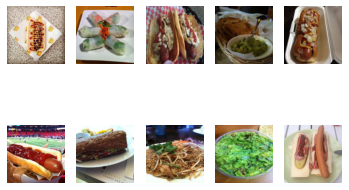

In [191]:
import random 

fig,ax = plt.subplots(2,5)
index_list = [random.randrange(1, len(get_path()), 1) for i in range(10)]
print(index_list)
train_paths = get_path()

filenames=[train_paths[idx] for idx in index_list] 
for i in range(10):
    with open(filenames[i],'rb') as f:
        image=Image.open(f)
        ax[i%2][i//2].imshow(image)
        ax[i%2][i//2].axis('off')
fig.show()

#### The images may have different shape/size.

In [192]:
# See the shape of an image
sample_img = Image.open(train_paths[1])
print(np.array(sample_img).shape)

(200, 200, 3)


#### Standard PCA methods implemented in Scikit-learn do not work for color imgaes (RGB), so we will transform the images into greyscale.

In [193]:
import matplotlib

# Transform color images to greyscale
def rgb2gray(rgb_img):
    return np.dot(rgb_img[...,:3], [0.2989, 0.5870, 0.1140])

# Given the image path, return the resized image as an numpy 2d array
def get_image(path):
    img = Image.open(path)
    img = img.resize((200,200))
    img.save(path)
    img = matplotlib.image.imread(path)
    gray = rgb2gray(img)  
    return np.array(gray)

In [194]:
print(get_image(train_paths[1]).shape)

(200, 200)


#### Append image data and labels in to list

In [195]:
# Prepare the raw data: geryscale, train images and train labels
h, w = get_image(train_paths[1]).shape
train_data = np.empty((len(train_paths), h, w))
train_label = [1] * np.int(len(train_paths)/2) + [0] * np.int(len(train_paths)/2)
count = -1
for pth in train_paths:
    count += 1
    image = get_image(pth)
    train_data[count] = image
n_samples = train_data.shape[0]
X = np.empty((n_samples, h * w))
for i in range(n_samples):
    X[i] = train_data[i].flatten()
y = train_label
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (498, 40000)


#### Prepare the raw test data

In [196]:
test_paths = get_path(is_train=False)


# Prepare the raw dataframe: geryscale, test images and test labels
test_data = np.empty((len(test_paths), h, w))
test_label = [1] * np.int(len(test_paths)/2) + [0] * np.int(len(test_paths)/2)
count = -1
for pth in test_paths:
    count += 1
    image = get_image(pth)
    test_data[count] = image
X_test = np.empty((len(test_paths), h * w))
for i in range(n_samples):
    X_test[i] = test_data[i].flatten()
y_test = test_label
print(f"The shape of the test data is {X_test.shape}")

The shape of the test data is (500, 40000)


#### Shuffle the training dataset

In [197]:
# Shuffle the training dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X, y, random_state=0)
X_train
print(f"The shape of the training data is {X.shape}")

The shape of the training data is (498, 40000)


In [198]:
# Import additional libaries
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm

## Question 2.1 Reducing the dimensions (feature extraction) -- 15 pts

In this question, you will need to use a dimensionality reduction (feature extraction) method to project both <code>X_train</code> and <code>X_test</code> on a lower dimensions. Otherwise, training directly on the raw images will consume you a long time.

In [199]:
#### Your code here
# https://github.com/openai/CLIP
import torch
import clip
from PIL import Image
from torchvision import datasets
from tqdm import tqdm
from torch.utils.data import DataLoader
# load the model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
# load the dataset
root_train = os.path.expanduser("./train/")
root_test = os.path.expanduser("./test/")
train = datasets.ImageFolder(root_train, transform=preprocess)
test = datasets.ImageFolder(root_test, transform=preprocess)

def get_features(dataset):
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for images, labels in tqdm(DataLoader(dataset, batch_size=100)):
            features = model.encode_image(images.to(device))

            all_features.append(features)
            all_labels.append(labels)

    return torch.cat(all_features).cpu().numpy(), torch.cat(all_labels).cpu().numpy()

# Calculate the image features
train_features, train_labels = get_features(train)
test_features, test_labels = get_features(test)

100%|██████████| 5/5 [00:51<00:00, 10.34s/it]


## Question 2.2 Binary Image Classification -- 15 pts

In this question, you will need to find the most suitable machine learning models (as well as hyper-parameters) implemented in <code>Scikit-learn</code>, for example, fit on the projected training data and labels, then predict on the projected test data. The accuracy score determines the accuracy your model prediction.

**Hint:** here are some links for implemented machine learning models in Scikit-learn.

- SVM: [link](https://scikit-learn.org/stable/modules/svm.html)

- Gaussian Naive Bayes: [link](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB)

- A toy example about classifier comparisons: [link](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py)

- If you are unsure about hyperparameter selection, you may find [grid-search](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search) helpful.

- To achieve a high accuracy score, simply adopting PCA for feature extraction may not work. You may need to find some advanced feature extractor to reach a much better performance, i.e., >80%.


In [204]:
# Your code here
classifier = svm.SVC(kernel='rbf', gamma='auto', C=18)
classifier.fit(train_features, train_labels)
y_pred= classifier.predict(test_features)

# Evaluation (suppose your model prediction on X_test is y_pred)
print(f"Accuracy: {accuracy_score(test_labels, y_pred)}")


# observation
###############
# I noticed that feature extraction using PCA doesn't give more than 53% accuracy
# although I have tried differet kernal methods of SVC and different values of gamma and C
# Using CLIP easily gave me ~97% accuracy and with a little bit of gamma and C changes
# I got 98% accuracy!

Accuracy: 0.98


## Leaderboard

Depending on your best achieved accuracy score, the remaining points and bonus points are organized as below:

- **Accuracy score > 98%:** 10 pts + **10 bonus pts**

- **Accuracy score 96-98%:** 10 pts + **8 bonus pts**

- **Accuracy score 94-96%:** 10 pts + **6 bonus pts**

- **Accuracy score 92-94%:** 10 pts + **4 bonus pts**

- **Accuracy score 90-92%:** 10 pts + **2 bonus pts**

- **Accuracy score 80-90%:** 10 pts

- **Accuracy score 70-80%:** 8 pts

- **Accuracy score 61-70%:** 6 pts

- **Accuracy score 58-61%:** 4 pts

- **Accuracy score 55-58%:** 2 pts

- **Accuracy score < 55%:** 0 pts 
